# Homework 3
DATA 5630 - Deep Forecasting

Dallin Moore & Alesandro Rodriguez

## Install Dependencies


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.time_series import *
from sklearn.metrics import r2_score

# Part 1- Exponential Smoothing Methods

## 1. Read in the CSV

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/US_macro_Quarterly.csv", index_col=0)
df.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 2. Change the index to 'Period Index' (Quarterly)

In [37]:
df.index = pd.to_datetime(df.index).to_period('Q')
df.index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

## 3. Drop all columns except Consumer Price Index ('cpi')

In [38]:
df = df.loc[:, ['cpi']]
df.head()

,cpi
1959Q1,28.98
1959Q2,29.15
1959Q3,29.35
1959Q4,29.37
1960Q1,29.54


## 4. Plot Consumer Price Index

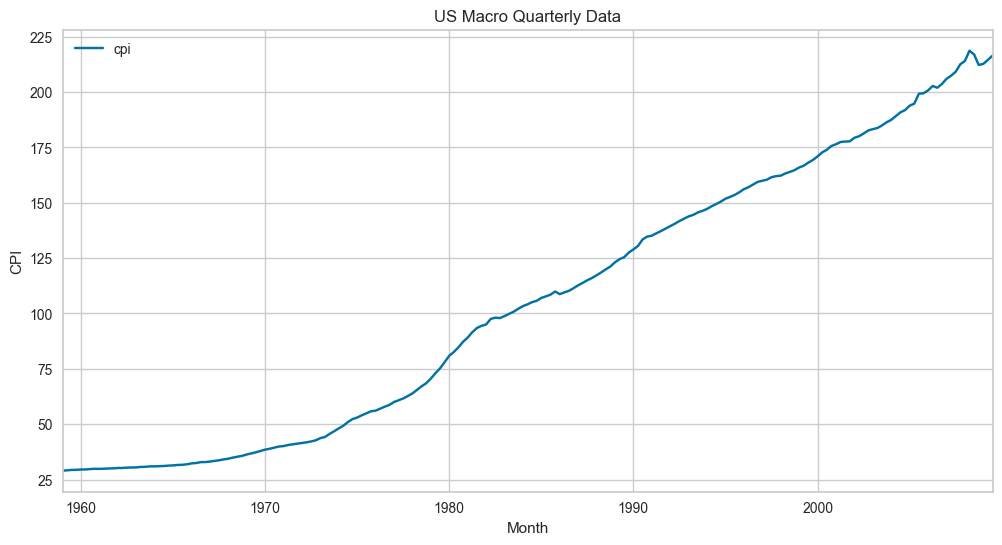

In [39]:
df.plot(figsize=(12,6))
#adding months to the x-axis
plt.xlabel('Month')
plt.ylabel('CPI')
plt.title('US Macro Quarterly Data')
plt.show()

There is no seasonality, just an upwards trend. The best model looks like it will be Holt's Linear Method.

## 5. Setup the PyCaret experiment

In [40]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='cpi' ,  fh = 24)

AttributeError: module 'dask.dataframe.core' has no attribute 'DataFrame'


There are 179 in-sample observations, with 24 hold out observations.

## 6. Plot the Train-Test Split and the Decomposition Plots

In [ ]:
exp.plot_model(plot='train_test_split')

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [ ]:
exp.plot_model(plot='decomp')

## 7. Models
### SES

Does the following show metrics in the holdout set?

In [ ]:
ses = exp.create_model('exp_smooth', trend=None, seasonal=None, sp=None, cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

$R^2$ in the holdout set:



In [ ]:
r2_score(df['cpi'][-24:], ses.predict(df.index[-24:]))

-3.4564495299846314

$R^2$ in the train set:



In [ ]:
r2_score(df['cpi'][:-24], ses.predict(df.index[:-24]))

0.9995696422397906

### Holt's Linear

In [ ]:
ht = exp.create_model('exp_smooth', trend='add', seasonal=None, sp = None, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

$R^2$ in the holdout set:



In [ ]:
r2_score(df['cpi'][-24:], ht.predict(df.index[-24:]))

0.3378208854975925

$R^2$ in the train set:



In [ ]:
r2_score(df['cpi'][:-24], ht.predict(df.index[:-24]))

0.9999281715411054

### Holt-Winters (Additive)

In [ ]:
hw_add = exp.create_model('exp_smooth', trend='add', seasonal='add', sp= 12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.7001,2.6076,7.1233,8.2041,0.0342,0.0350,0.3198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

$R^2$ in the holdout set:



In [ ]:
r2_score(df['cpi'][-24:], hw_add.predict(df.index[-24:]))

0.3198085025549944

$R^2$ in the train set:



In [ ]:
r2_score(df['cpi'][:-24], hw_add.predict(df.index[:-24]))

0.9999292973221766

### Holt-Winters (Multiplicitive)

In [ ]:
hw_mul = exp.create_model('exp_smooth', trend='add', seasonal='mul', sp= 12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8172,2.7121,7.4323,8.5326,0.0357,0.0365,0.2642


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

$R^2$ in the holdout set:



In [ ]:
r2_score(df['cpi'][-24:], hw_mul.predict(df.index[-24:]))

0.2642398883445336

$R^2$ in the train set:



In [ ]:
r2_score(df['cpi'][:-24], hw_mul.predict(df.index[:-24]))

0.99992996835566

## 8. Which method has the highest R-squared in the in-sample and the holdout set?
**In-sample/train set:** Holt's Linear Trend - 0.3378

**Holdout/test set:** Holt-Winters' Mutiplicitive - 0.999929



## 9. Plot the in-sample predictions

In [ ]:
exp.plot_model([ses, ht, hw_add, hw_mul], plot='insample', data_kwargs={'labels':["SES", "Holt", "Holt-Winters Add", "Holt-Winters Mul"]})


## 10. Plot the 36-period forecasts

In [ ]:
exp.plot_model([ses, ht, hw_add, hw_mul], plot='forecast', data_kwargs={'fh':36, 'labels':["SES", "Holt", "Holt-Winters Add", "Holt-Winters Mul"]})


## 11. Can our best model outperform a naive forecast?

In [ ]:
# Create Naive Model
naive = exp.create_model('naive', cross_validation=False)

# Compare models with naive baseline
exp.compare_models(include=[ses, ht, hw_add, hw_mul, naive], cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Exponential Smoothing,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378,0.0400
2,Exponential Smoothing,2.7001,2.6076,7.1233,8.2041,0.0342,0.0350,0.3198,0.1100
3,Exponential Smoothing,2.8172,2.7121,7.4323,8.5326,0.0357,0.0365,0.2642,0.1300
0,Exponential Smoothing,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0200
4,Naive Forecaster,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0200


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

ExponentialSmoothing(trend='add')

The top model, Holt's Linear Trend, performed better than the naive forecast.

# Part 2- ETS models

## 1. Create the models
Create the following models (again, make sure cross_validation=False for all the models)

ETS(A,N,N). What is the hold-out MAPE? How do you interpret MAPE? (5 points)

ETS(A,A,N). What is the hold-out RMSE? What is the unit of RMSE? (5 points)

ETS(A,A,A). What is the hold-out sMAPE? What is sMAPE? (5 points)

In [ ]:
ets_ANN = exp.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0102,6.6746,18.4941,20.9996,0.0887,0.0940,-3.4565


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The MAPE for the model is 0.0887, meaning that the average percentage error between predicted and actual values is 8.87%. Being less than 10% is very promising for the model.

In [ ]:
ets_AAN = exp.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The holdout RMSE is 8.0947 CPI index points. The unit of RMSE in the results is CPI index points.

In [ ]:
ets_AAA = exp.create_model('ets', error="add", trend="add", seasonal="add" ,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6999,2.6075,7.1228,8.2035,0.0342,0.0350,0.3199


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The metric sMAPE is especially helpful when dealing with zero/near-zero values. It normalizes by the average of actual and predicted values, ensuring that over-predictions and under-predictions contribute equally to the error. Our sMAPE value is 0.0365, or 3.65%, which is less than 10% and very promising.

## 2. Compare Models

In [ ]:
exp.compare_models(include=[ets_ANN, ets_AAN, ets_AAA, naive], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,ETS,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378,0.0400
2,ETS,2.6999,2.6075,7.1228,8.2035,0.0342,0.0350,0.3199,0.0700
3,Naive Forecaster,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0200
0,ETS,7.0102,6.6746,18.4941,20.9996,0.0887,0.0940,-3.4565,0.0400


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

AutoETS(sp=3, trend='add')

The model ETS(A,A,N) performed the best and beat the naive forecast model.

## 3. Plot 36-period Forecast

In [ ]:
exp.plot_model([ets_ANN, ets_AAN, ets_AAA], plot='forecast', data_kwargs={'fh':36, 'labels':["ETS(A,N,N)", "ETS(A,A,N)", "ETS(A,A,A)"]})


The ETS(A,A,A) and ETS(A,A,N) are nearly overlapping, and comparing their values in the table you can see how similar they are.

## 4. Make a prediction
The best prediction for the 2009, quarter 3 is the following:

In [ ]:
ets_AAN_prediction = ets_AAN.predict(pd.period_range(start='2009Q3', periods=1, freq='Q'))
ets_AAN_prediction

,cpi
2009Q3,206.956204


## 5. Finalize the best ETS model
Forecast using the final model on 2023Q1

In [ ]:
final_ETS = exp.finalize_model(ets_AAN)
final_ETS

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                AutoETS(sp=3,
                                                                        trend='add'))]))])

In [ ]:
final_ETS.predict(pd.period_range(start='2023Q1', periods=1, freq='Q'))

,cpi
2023Q1,268.950893
